<a href="https://colab.research.google.com/github/karinefonseca/machine_learning/blob/main/Retencao_de%20Clientes_Modelo_Churn/Pr%C3%A9_processamendo_de_Dados__Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

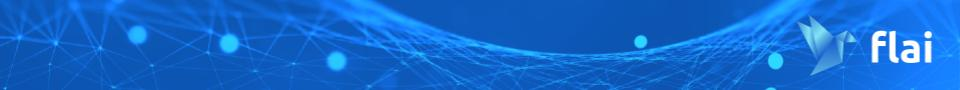

## **Aula 8 - Pré-processamendo de Dados: Churn Data**

---
## **Importação e Preparação dos Dados**

In [ ]:
# fonte: https://www.kaggle.com/shrutimechlearn/churn-modelling

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/churn.csv'
dados = pd.read_csv(url)

In [ ]:
dados

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dados['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

## **Análise Exploratória dos Dados** 

                                             |          | [  0%]   00:00 -> (? left)


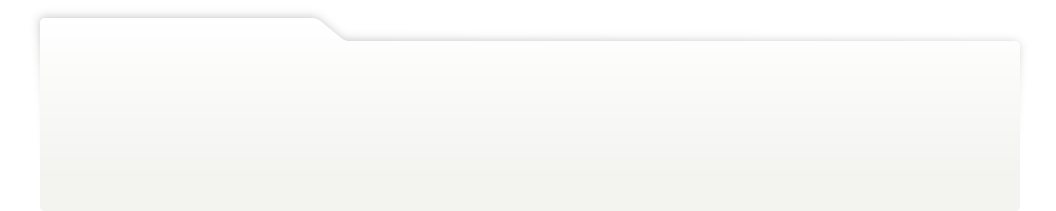
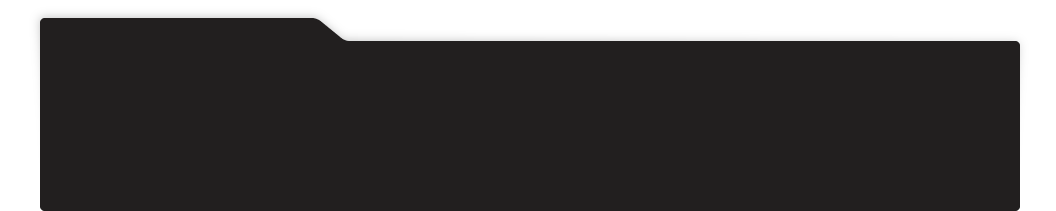
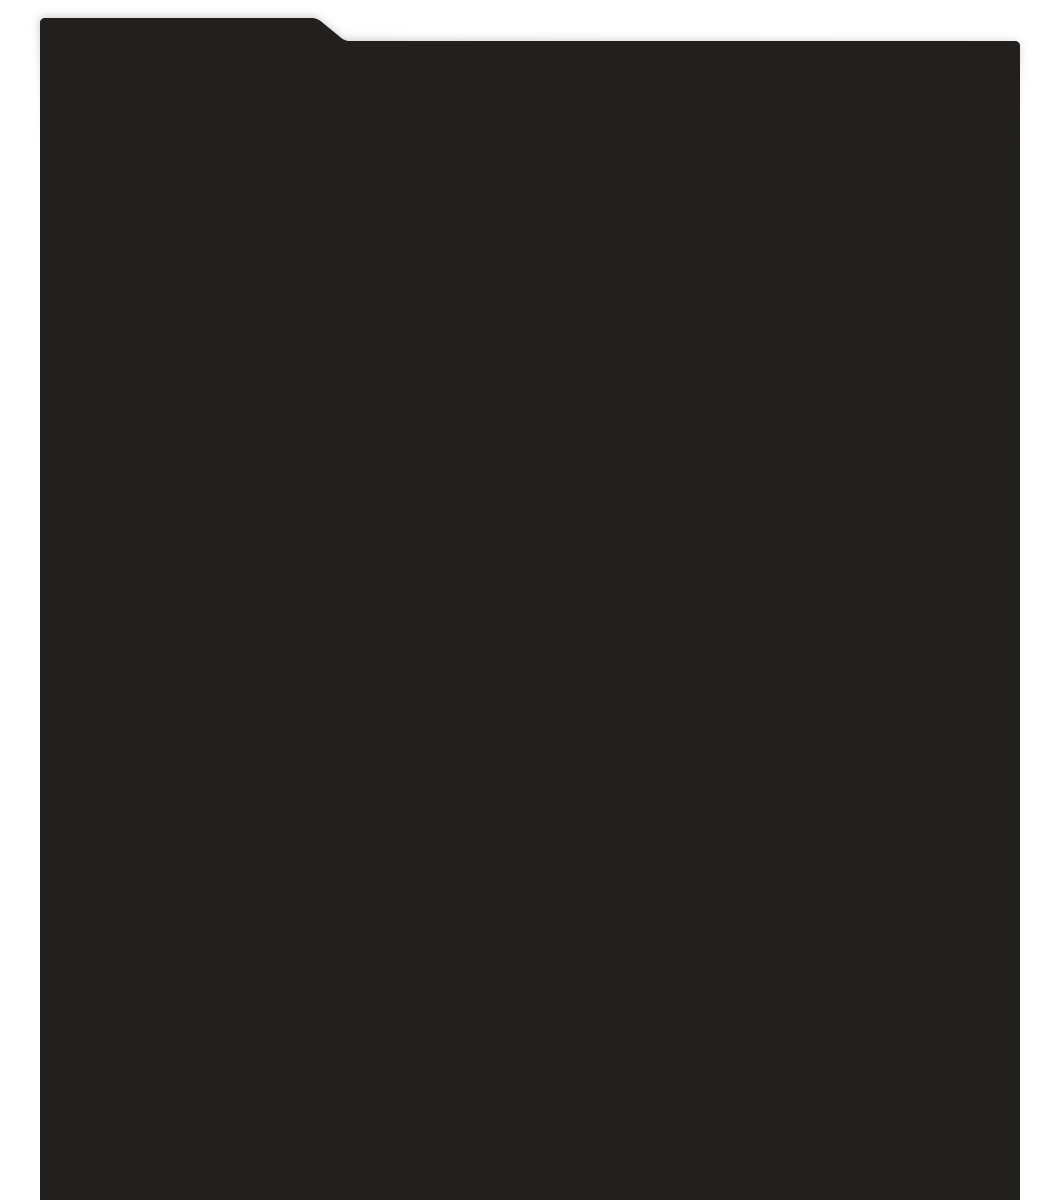
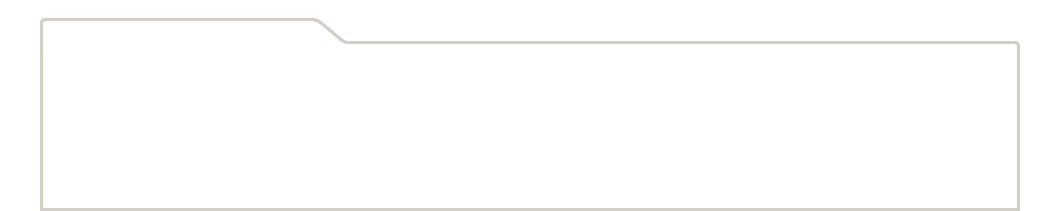
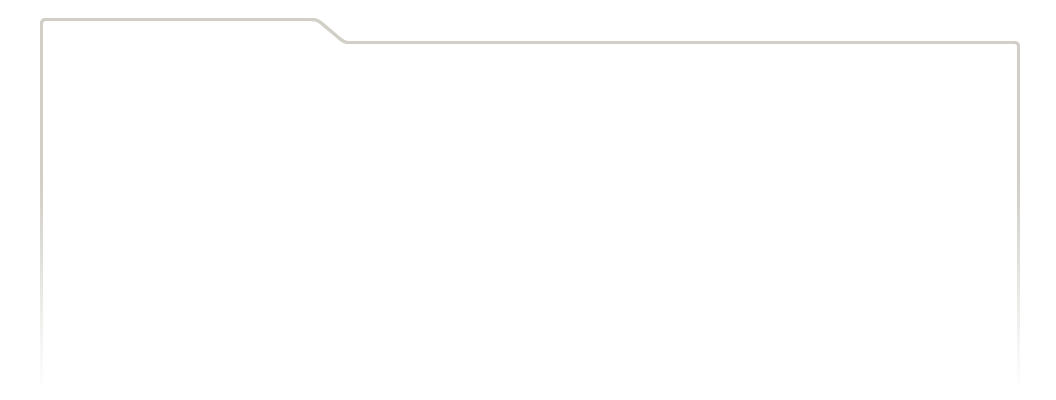
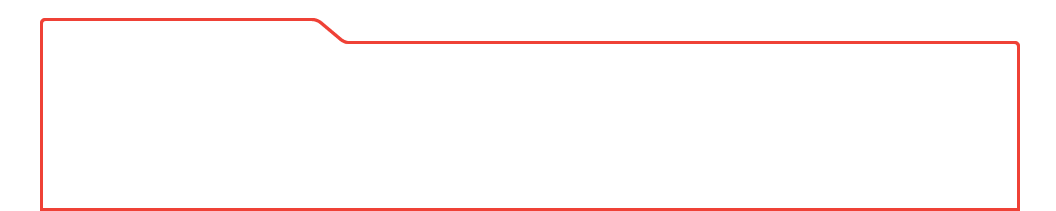
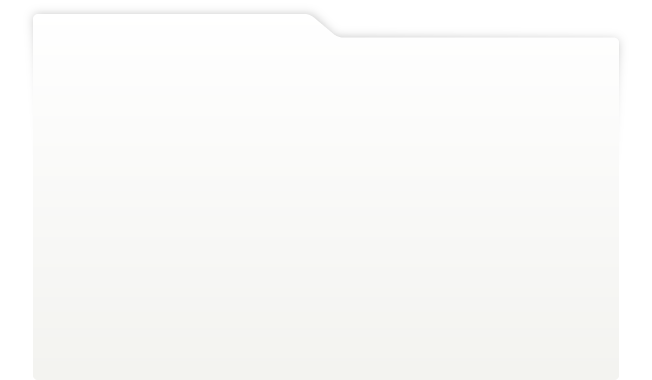
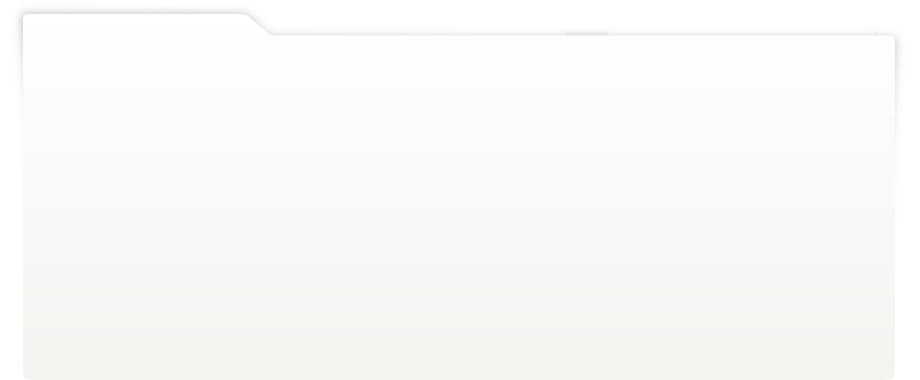
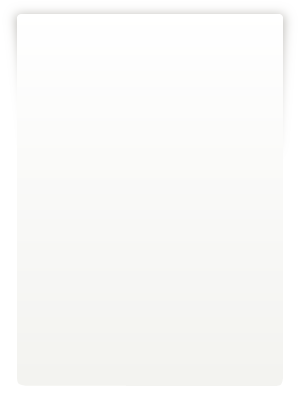
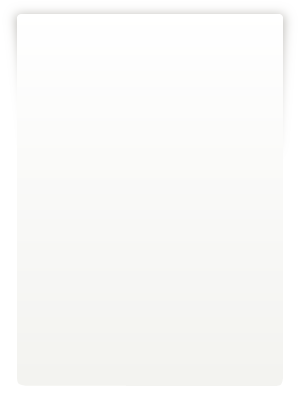
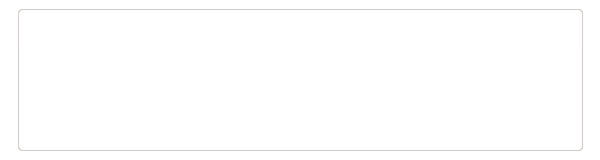
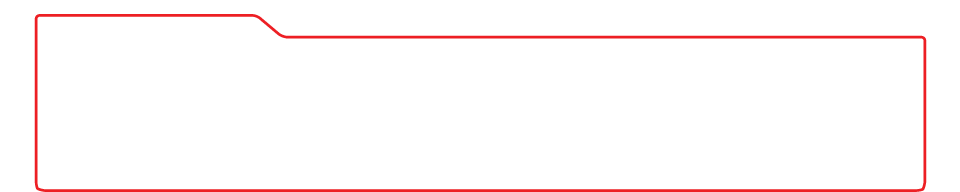
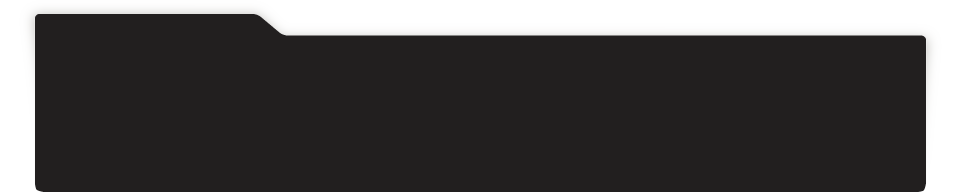
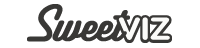
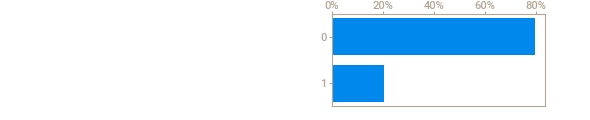
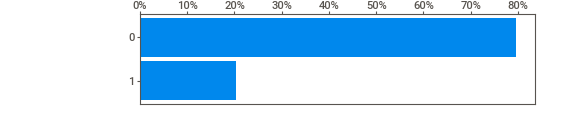
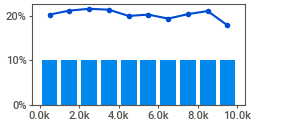
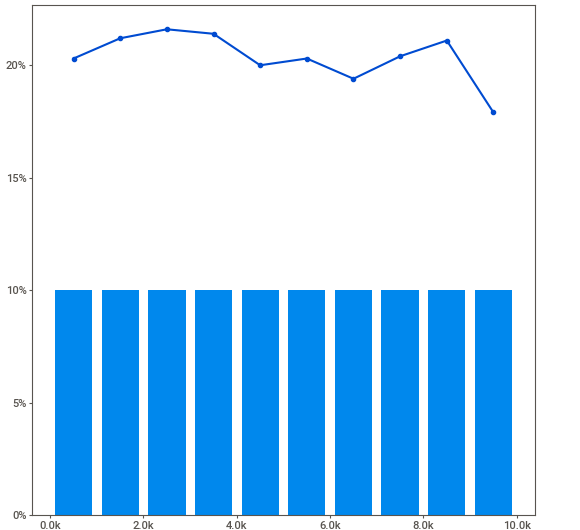
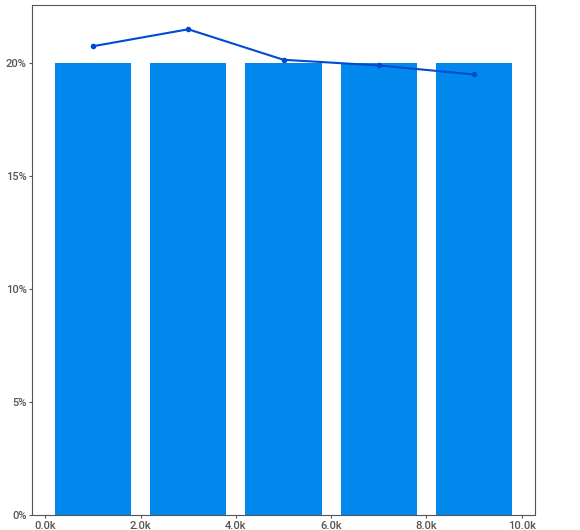
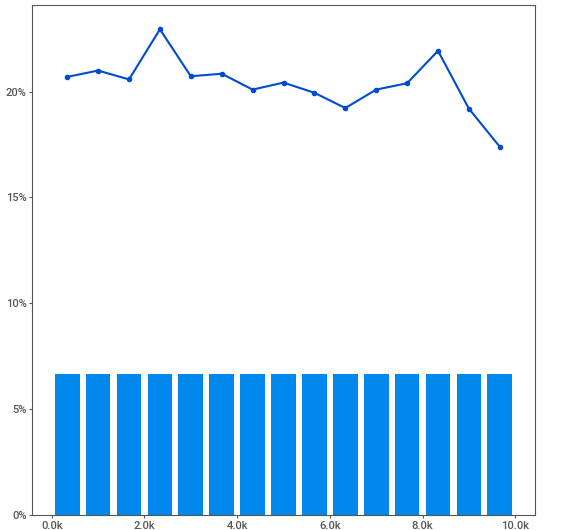
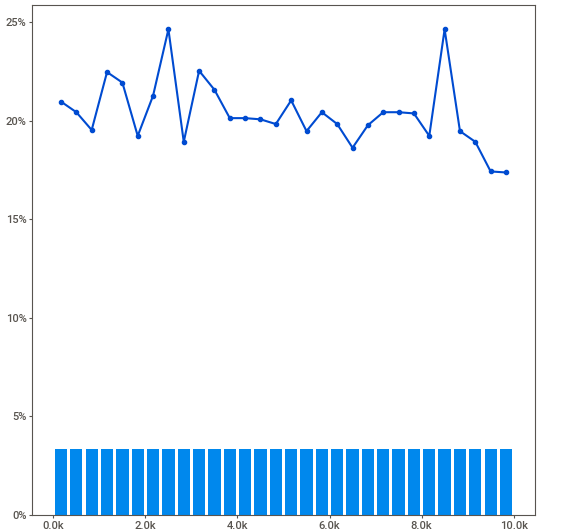
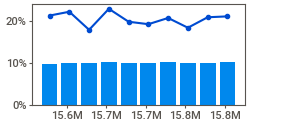
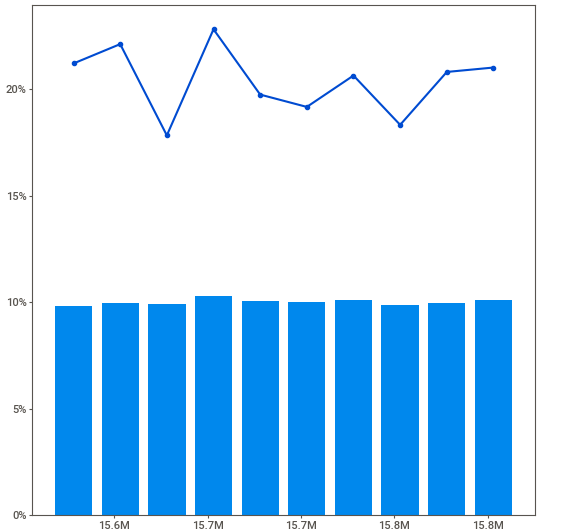
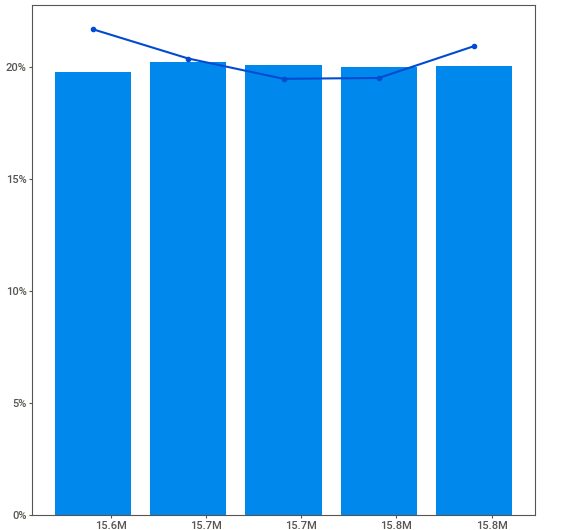
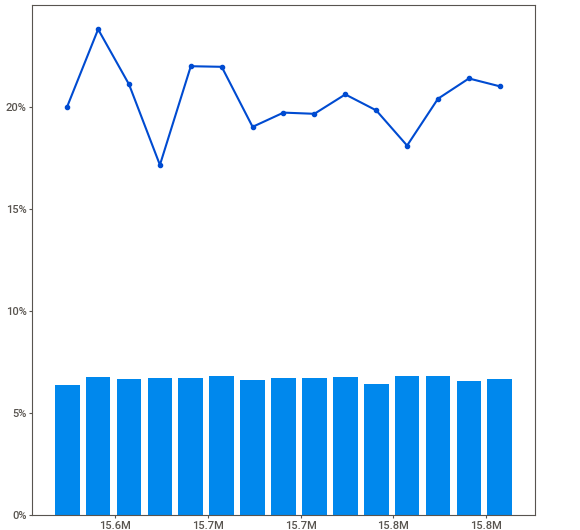
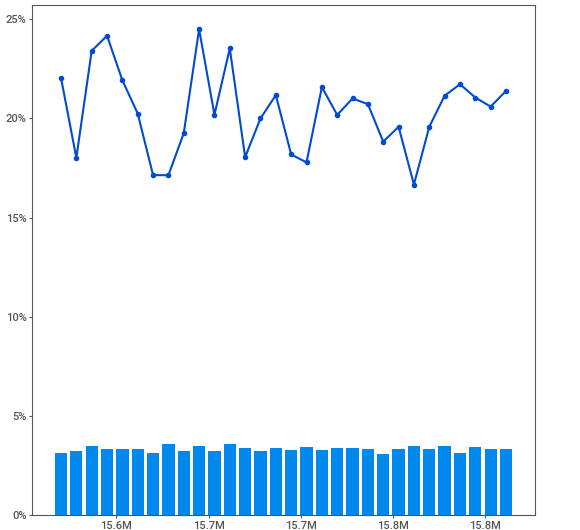
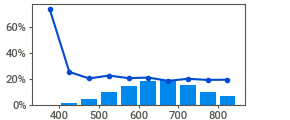
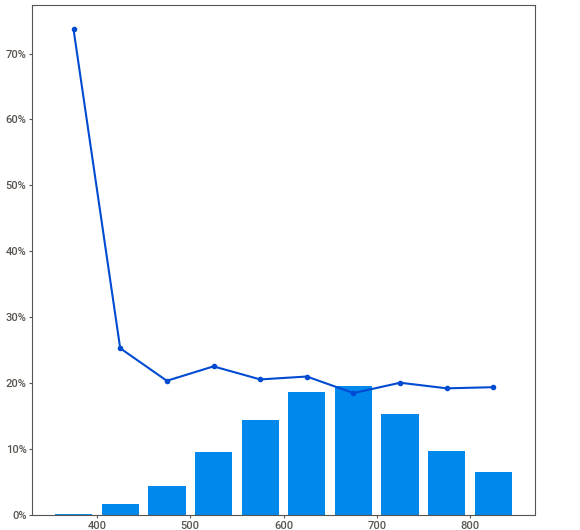
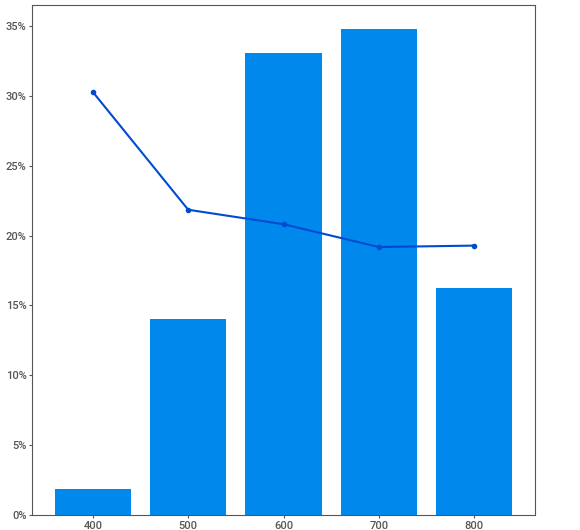
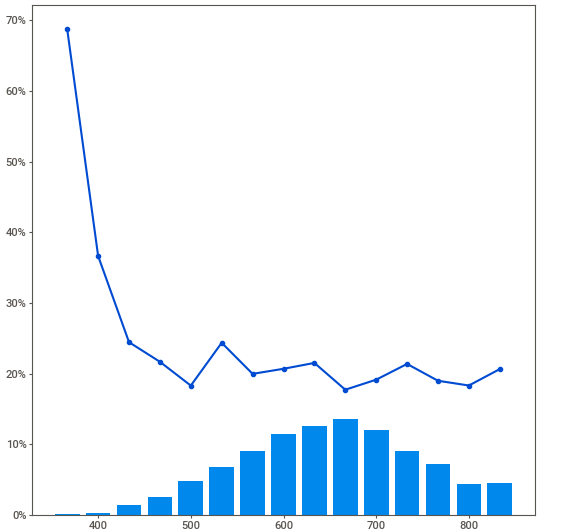
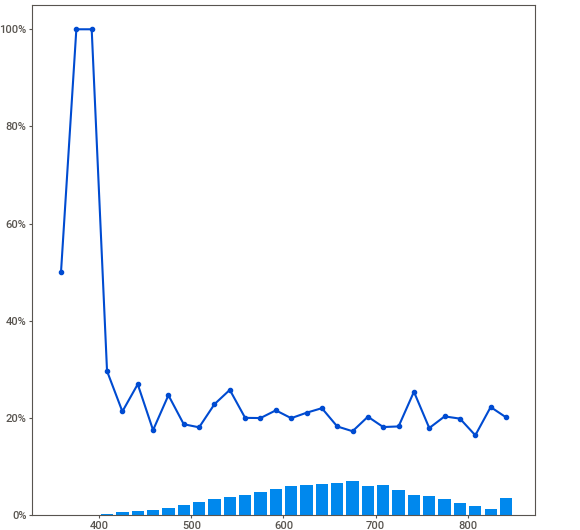
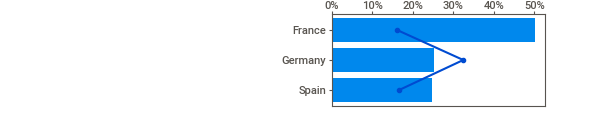
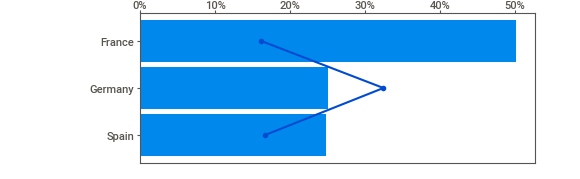
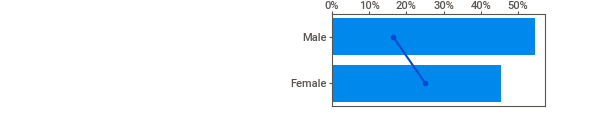
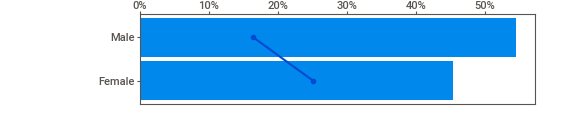
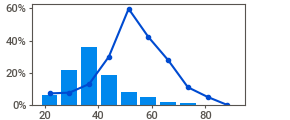
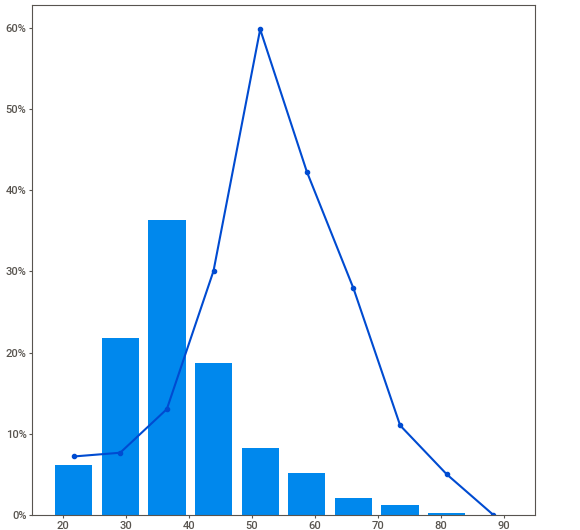
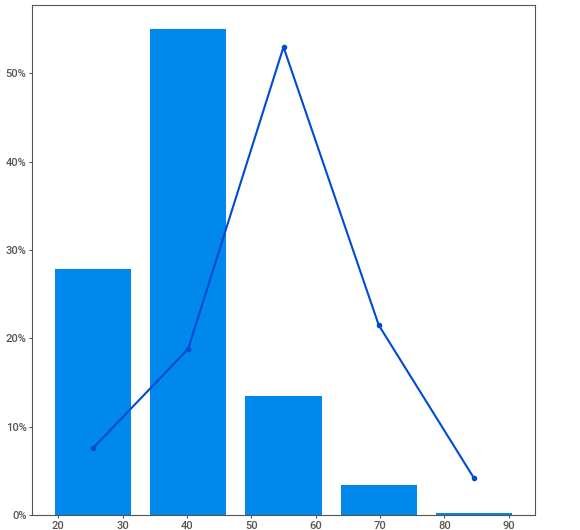
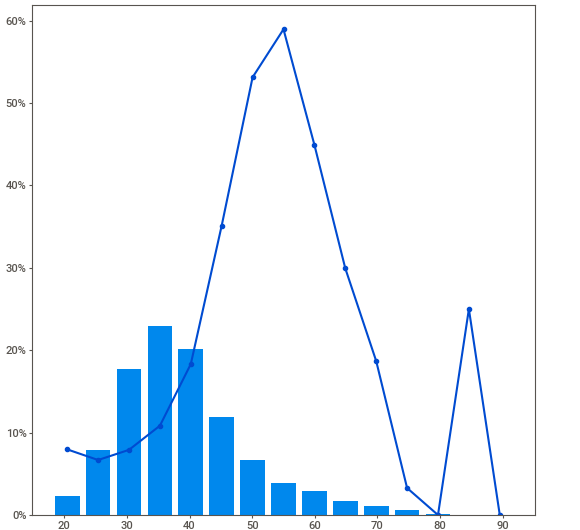
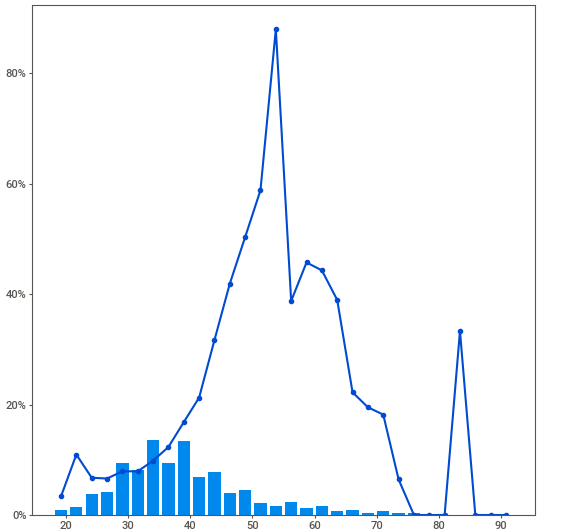
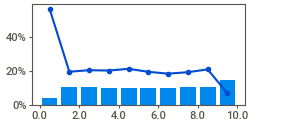
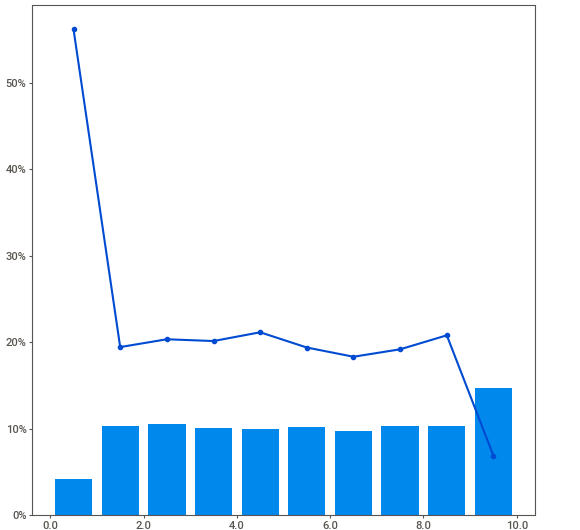
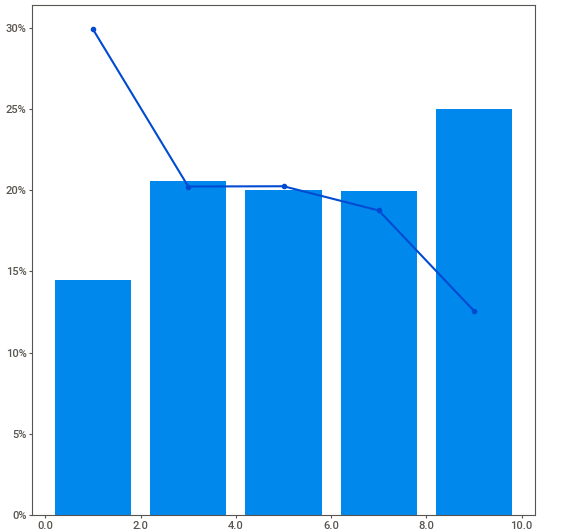
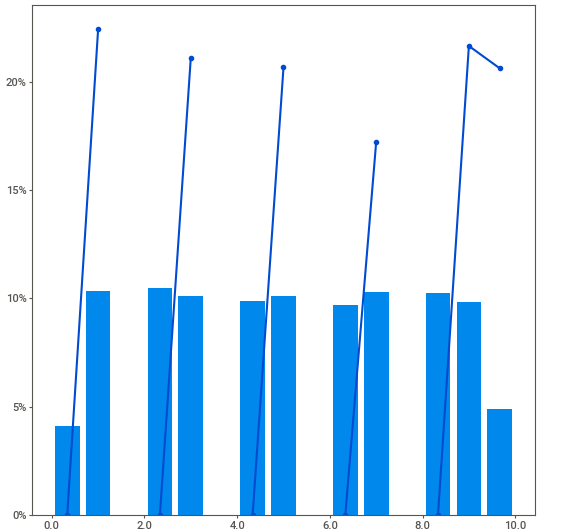
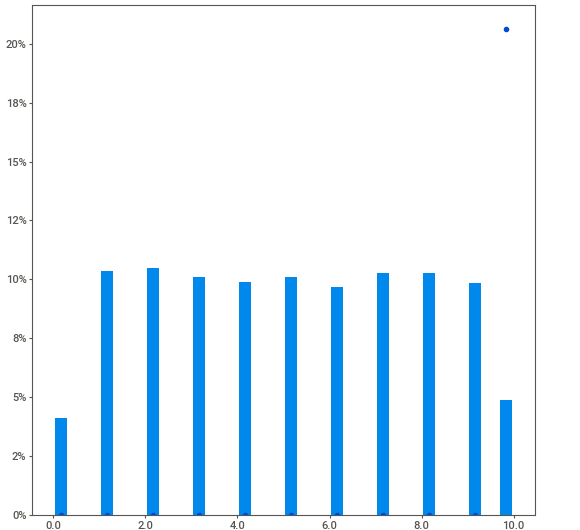
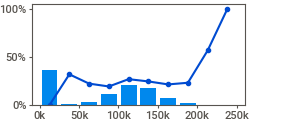
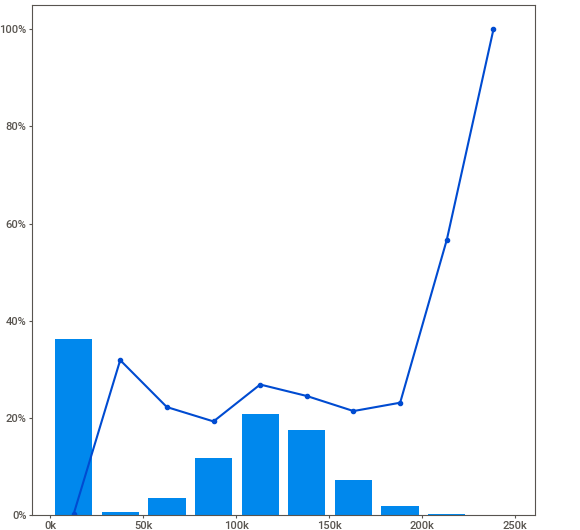
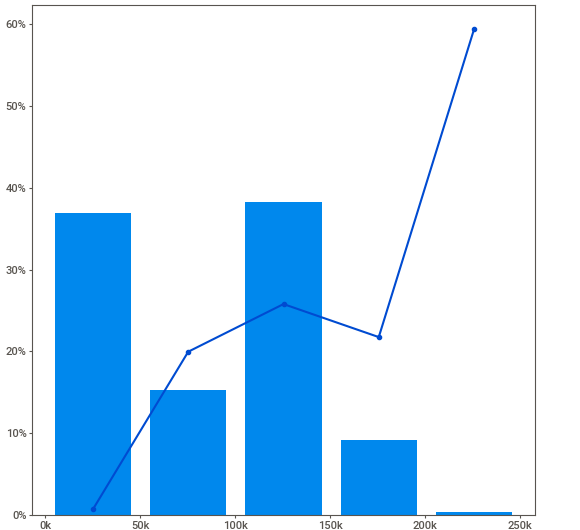
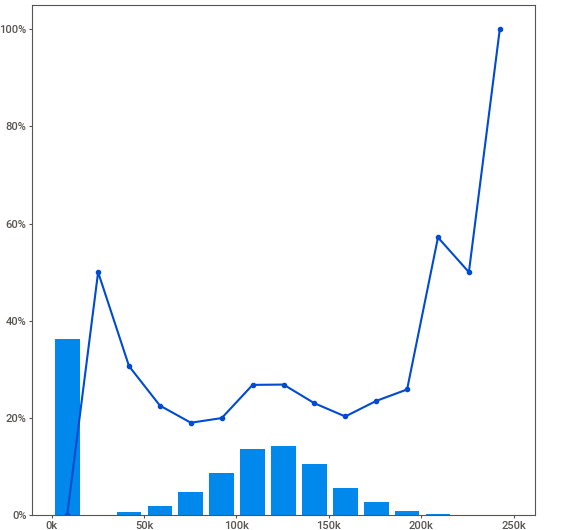
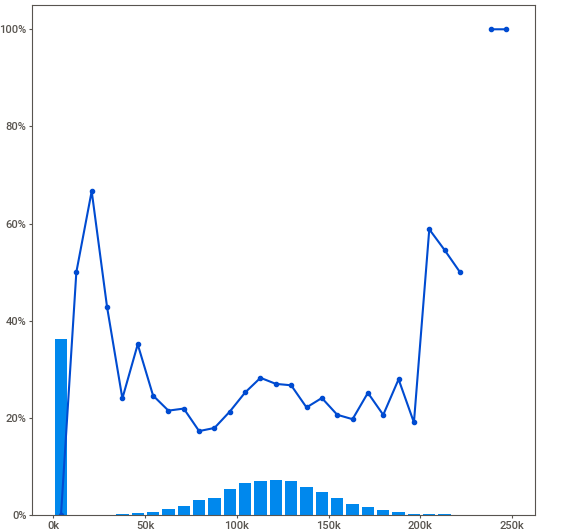
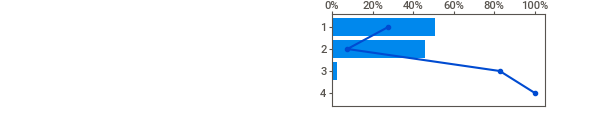
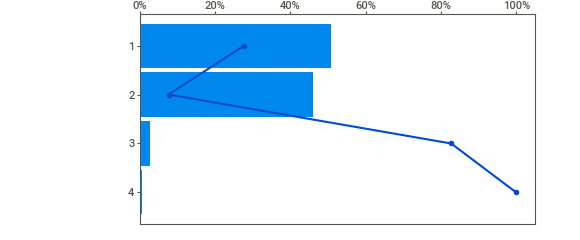
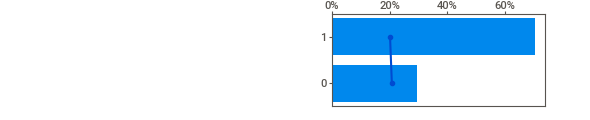
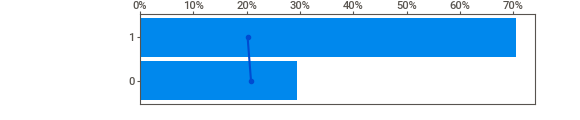
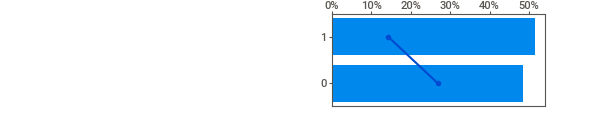
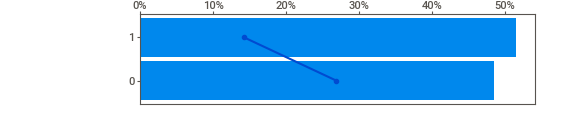
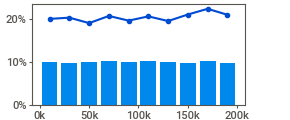
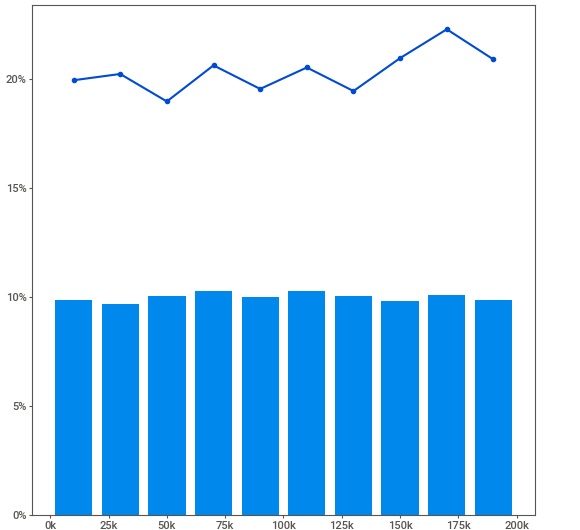
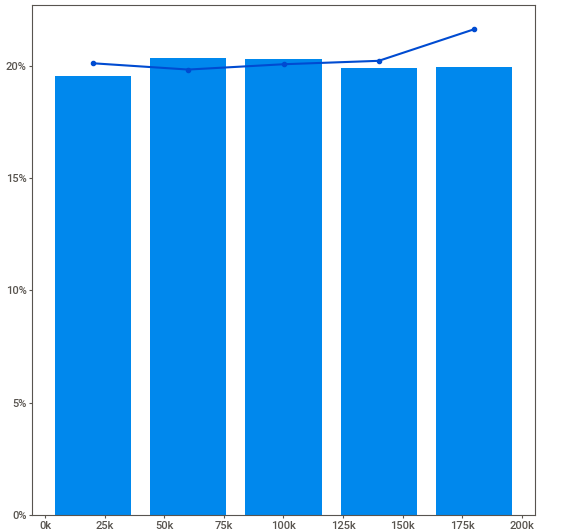
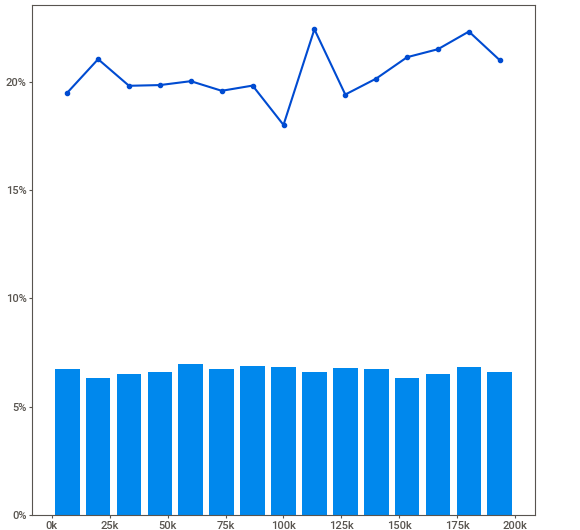
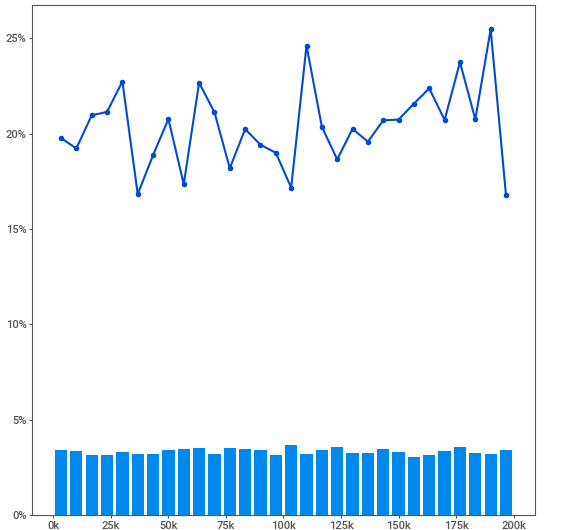
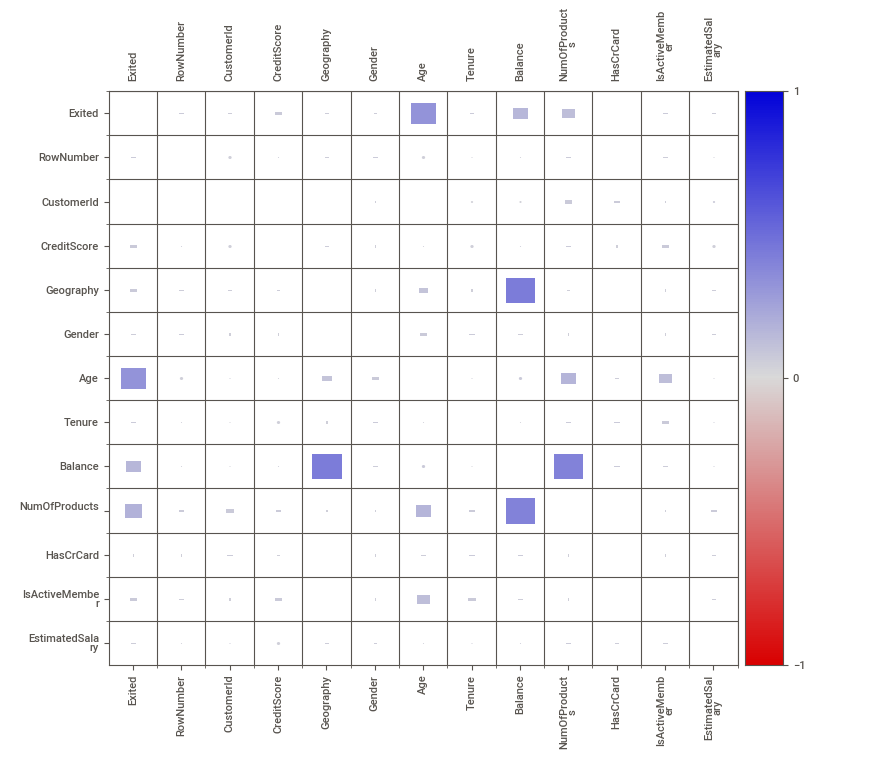
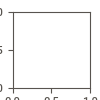

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 
import sweetviz as sv
eda = sv.analyze(source = dados, target_feat = 'Exited')
eda.show_notebook()

---
## **Pré-processamento para Machine Learning**

Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequado para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos). 



In [ ]:
dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


---
### **PP1 - Descarte de variáveis não importantes**

In [ ]:
# dropando as variaveis de interesse
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [ ]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---
### **PP2 - Verificação de dados faltantes**

In [ ]:
dados.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
import missingno as missing

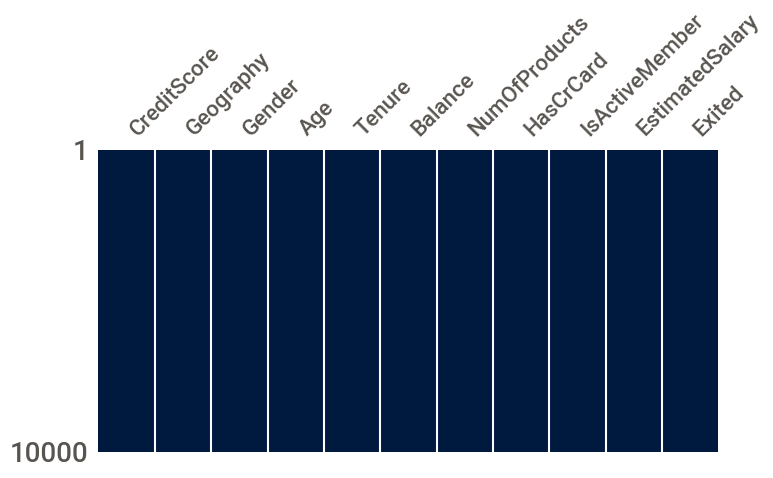

In [ ]:
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

---
### **PP3 - Categorização de variáveis contínuas**

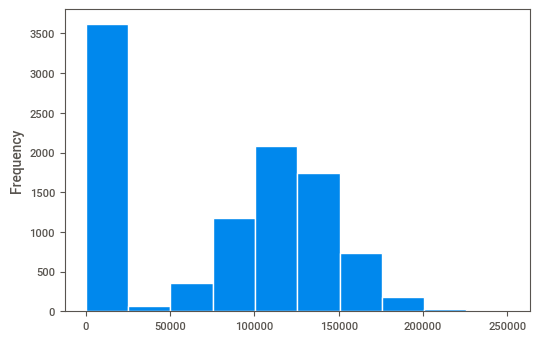

In [ ]:
dados['Balance'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
dados[dados['Balance'] > 0]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

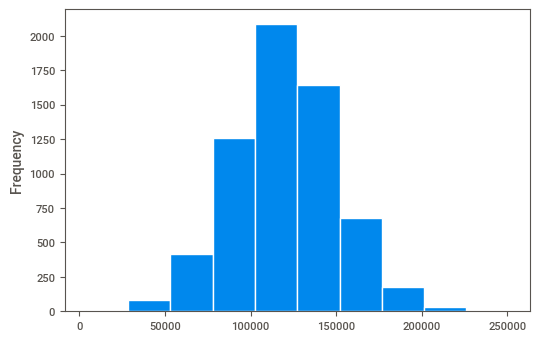

In [ ]:
dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k+'

dados['Balance'] = dados['Balance'].apply(auxiliar)
dados.head()

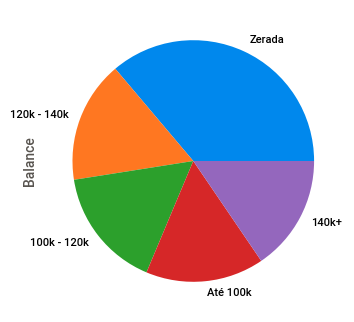

In [ ]:
dados['Balance'].value_counts().plot(kind ='pie');

---
### **PP4 - Agrupamento de Categorias**

In [ ]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,140k+,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,120k - 140k,1,1,1,79084.10,0


In [ ]:
dados['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
def auxiliar(x):
    if x == 0:
        return '0-'
    elif x <= 3:
        return '1-3'
    elif x <= 6:
        return '4-6'
    elif x <= 9:
        return '7-9'
    else:
        return '10-'

dados['Tenure'] = dados['Tenure'].apply(auxiliar)

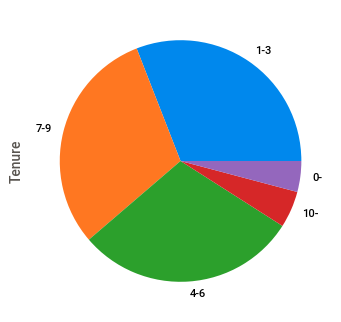

In [ ]:
dados['Tenure'].value_counts().plot(kind = 'pie');

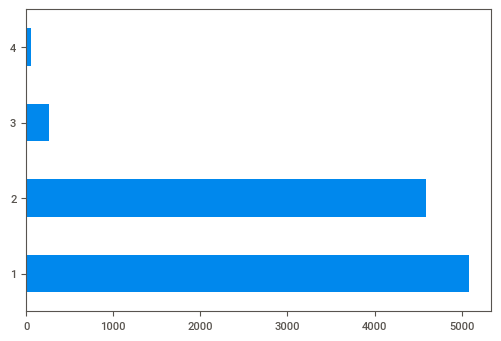

In [ ]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh');

In [ ]:
def auxiliar(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'

dados['NumOfProducts'] = dados['NumOfProducts'].apply(auxiliar)

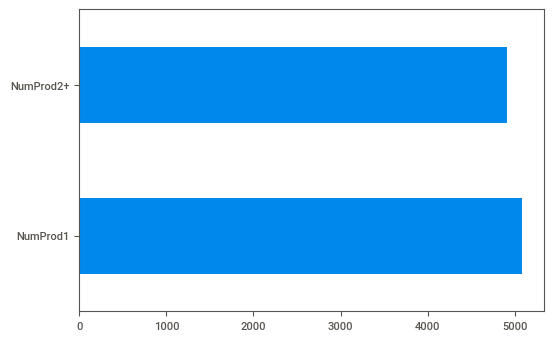

In [ ]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh');

In [ ]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,1-3,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,1-3,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,7-9,140k+,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,1-3,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,1-3,120k - 140k,NumProd1,1,1,79084.10,0


---
### **PP5 - Dummyficação de Variáveis**

In [ ]:
pd.get_dummies(dados['Geography'], drop_first = True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
variaveis_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [ ]:
dados

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,619,42,1,1,101348.88,1,0,0,0,1,0,0,0,0,0,0,1,0
1,608,41,0,1,112542.58,0,0,1,0,1,0,0,0,0,0,1,0,0
2,502,42,1,0,113931.57,1,0,0,0,0,0,0,1,0,1,0,0,1
3,699,39,0,0,93826.63,0,0,0,0,1,0,0,0,0,0,0,1,1
4,850,43,1,1,79084.10,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,1,0,96270.64,0,0,0,1,0,0,1,0,0,0,0,1,1
9996,516,35,1,1,101699.77,0,0,0,1,0,1,0,0,0,0,1,0,0
9997,709,36,0,1,42085.58,1,0,0,0,0,0,0,1,0,0,0,1,0
9998,772,42,1,0,92888.52,1,1,0,1,1,0,0,0,0,0,1,0,1


---
### **PP6 - Escala das Variáveis Contínuas**

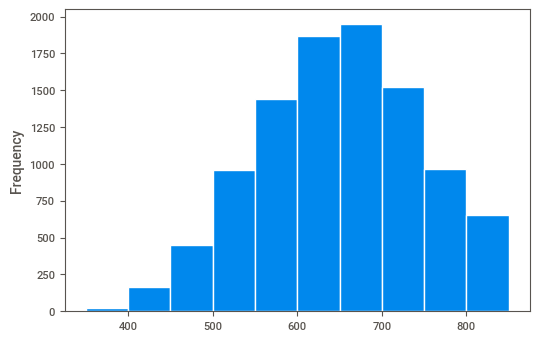

In [ ]:
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
dados['CreditScore'] = dados['CreditScore']/1000 

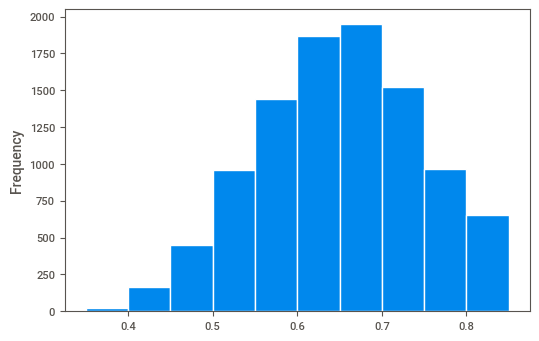

In [ ]:
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white');

---

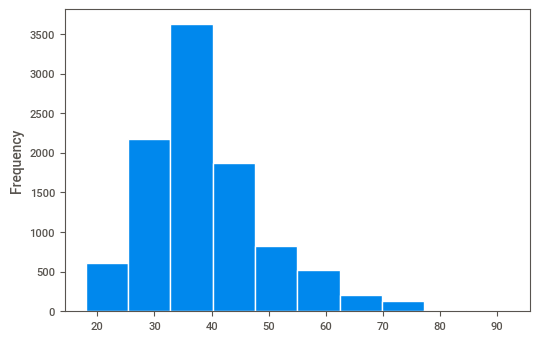

In [ ]:
dados['Age'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
# padronização

import numpy as np
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])

dados['Age'] = (dados['Age'] - media)/desvio

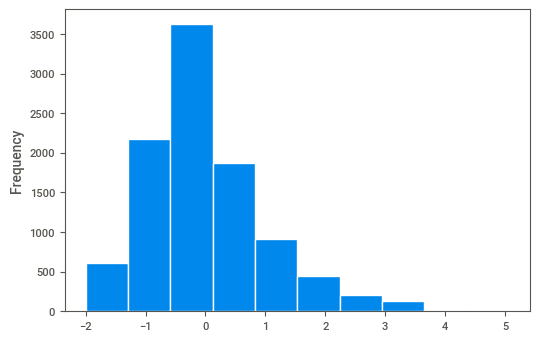

In [ ]:
dados['Age'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
-2*desvio + media

17.947235903456814

In [ ]:
dados['Age'].describe().round(2)

count    10000.00
mean         0.00
std          1.00
min         -1.99
25%         -0.66
50%         -0.18
75%          0.48
max          5.06
Name: Age, dtype: float64

---

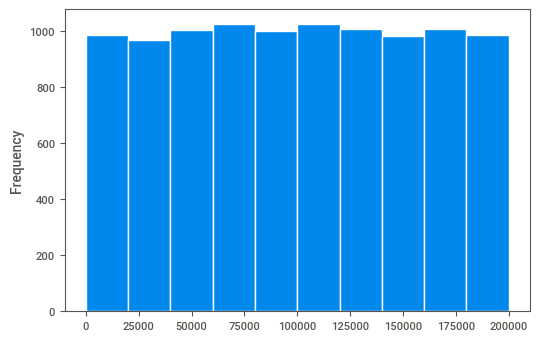

In [ ]:
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
dados['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
dados['EstimatedSalary'] = dados['EstimatedSalary']/200000

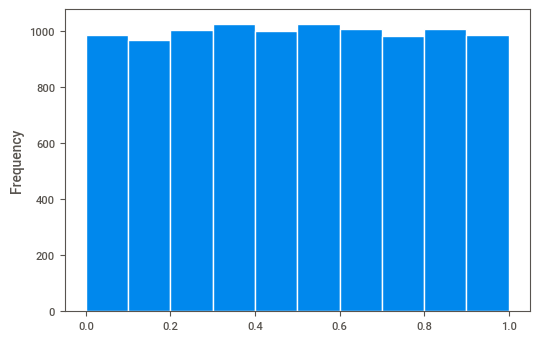

In [ ]:
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white');

In [ ]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,0.619,0.293517,1,1,0.506744,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0.608,0.198164,0,1,0.562713,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0.502,0.293517,1,0,0.569658,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0.699,0.007457,0,0,0.469133,0,0,0,0,1,0,0,0,0,0,0,1,1
4,0.850,0.388871,1,1,0.395421,0,0,1,0,1,0,0,0,1,0,0,0,0


## **Machine Learning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)


In [ ]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


In [ ]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Árvore (prof = 7),0.83600,0.385114,0.671402,0.668226,0.488080
5-NN,0.82280,0.385364,0.602205,0.660031,0.469198
15-NN,0.83425,0.333807,0.694985,0.648034,0.450223
Bagging,0.82195,0.353451,0.611208,0.647621,0.446908
"Random Forest (arvs = 100, prof = 7)",0.84140,0.313502,0.773787,0.644978,0.444939
25-NN,0.83735,0.318867,0.732022,0.644427,0.443599
Árvore (prof = 5),0.83475,0.326178,0.714889,0.645506,0.442656
"Random Forest (arvs = 50, prof = 7)",0.84045,0.308551,0.771596,0.642534,0.439685
Regressão Logística,0.81650,0.259943,0.618258,0.609408,0.365391
"Random Forest (arvs = 100, prof = 5)",0.83240,0.223364,0.831985,0.605780,0.351076


## **Avaliação do Resultado**